                             Customer Default Prediction using AdaBoost(LOAN)                                

# Customer_Default_Prediction_using_AdaBoost(LOAN)

Customer Default Prediction is used by many banks and loan lenders to determine whether a person will be able to return the money they lend them or not. For this we be using AdaBoost which is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier. The algorithm works by iteratively training sequence of classifiers each focusing on correcting the errors made by the previous one by assigning weights to the misclassified instances.

## Implementing Customer Default Prediction using AdaBoost

We will be implementing Customer Default Prediction using AdaBoost in Python. Below is a sample code to demonstrate how to use AdaBoost for this purpose.

## Core Libraries

* Pandas
* Numpy
* Scikit-learn
* Matplotlib
* Seaborn

### For Preprocessing the data

* simpleImputer 
* train_test_split
* StandardScaler
* LabelEncoder

### For Model Building

* AdaBoostClassifier

### Evaluation Metrics

* accuracy_score
* classification_report
* confusion_matrix

## Implentation

## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# Loading  the dataset

dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/gfg_LoanDataset---LoansDatasest.csv"

df = pd.read_csv(dataset)

In [11]:
df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


## Handling Missing Values and Preprocessing


In [12]:
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [13]:
df.shape

(32586, 13)

In [14]:
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

catogorical_cols = df.select_dtypes(include=['object']).columns
for col in catogorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
df.isnull().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [18]:
# Remove commas and convert strings to numbers
columns_to_clean = ['customer_income', 'loan_amnt']
for col in columns_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [19]:
# Double check for variable missing 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [20]:
# Encode the Catogrorical Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32586 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  int64  
 3   home_ownership       32586 non-null  object 
 4   employment_duration  32586 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            0 non-null      float64
 8   loan_int_rate        32586 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   32586 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32586 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 3.2+ MB


In [22]:
label_encoder = LabelEncoder()

df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['historical_default'] = label_encoder.fit_transform(df['historical_default'])
df['Current_loan_status'] = label_encoder.fit_transform(df['Current_loan_status'])

# Feature Seclection

In [23]:
X = df.drop('Current_loan_status', axis=1)
y = df['Current_loan_status']

In [24]:
# Splitting and Imputing the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['loan_amnt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['loan_amnt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## Model Training

In [25]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [26]:
# model evalution

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9288125191776618
Confusion Matrix:
[[1052  324]
 [ 140 5002]]


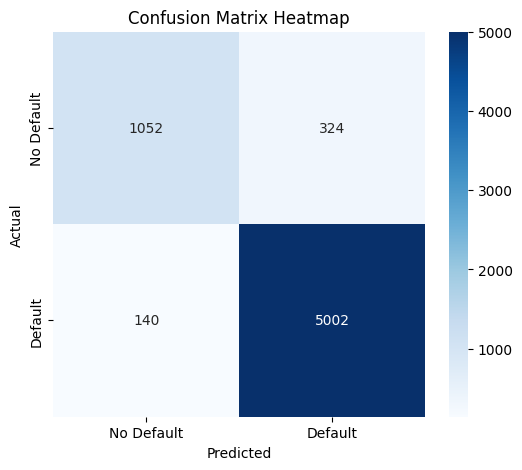

Accuracy:  92.8813%


In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
print(f'Accuracy: {accuracy* 100: .4f}%')

With an accuracy of 92.881% confusion matrix heatmap shows that the model correctly predicted 5002 customers would default and 1052 would not. However, it misclassified 324 customers as defaults when they weren’t and 140 as non-defaults when they were. This indicates good performance of model but further we can fine tune it make more accurate results.



In [28]:
## Save The model

import joblib
joblib.dump(model, 'customer_default_prediction_model.pkl')

['customer_default_prediction_model.pkl']